# Tutorial for Clathrin Self-assembly Simulation

## 0. Introduction
This tutorial will guide you through the process of generating input files, running simulations, and analyzing the results for a **clathrin self-assembly process** using NERDSS and ioNERDSS.


Clathrin is a 600kDa trimeric protrin that can assemble into both flat and spherical lattices in vivo and in vitro. In vivo, clathrin assembles on the plasma membrane and mediates endocytosis. Clathrin does not bind to the membrane directly. It binds to an adaptor protein (ap), which then binds to the membrane lipid PI(4,5)P2 (PIP2). Therefore, for this simulation, we would need to include three species: **clathrin**, **adaptor protein**, and **PIP2**. 

- In this model, the Clath + AP2_on_mem/pip2 is 25uM. koff=0.03s-1 (Clath + AP2_on_mem/IL 25uM)
Clath + Clath is 120uM. koff=10s-1. (Clath + Clath 120uM)

- Increase Clath + Clath if either molecule is bound to an AP2_on_mem/pip2, by a factor of 11.

- loopCoopFactor=0.001.

- Add reflecting site at clathrin COM to prevent passing through each other.

- length3Dto2D is 30nm for all binding reactions.

- The volume/area ratio = 1nm, ap2 concentration is 0.2 uM, and clathrin concentration in the solution is 0.65 uM.


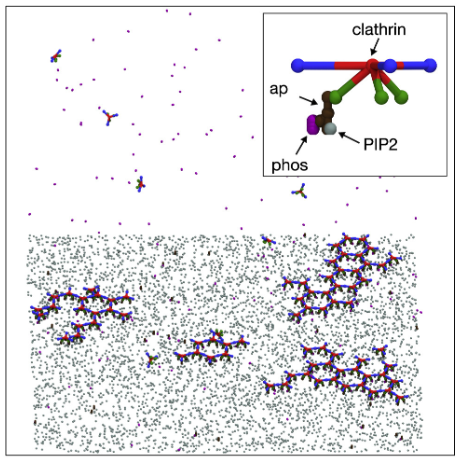


## 1. Library Installation

The ioNERDSS library in uploaded onto the official Python Package Index (https://pypi.org/project/ioNERDSS/), where all information about this package can be found.

Run the following code in command line to install ioNERDSS from PyPi library:

In [7]:
!pip install ioNERDSS

If ioNERDSS is already installed, to upgrade ioNERDSS, run the following code in command line:

In [8]:
!pip install --upgrade ioNERDSS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ioNERDSS: filename=ioNERDSS-1.0.22-py3-none-any.whl size=224654 sha256=bb82327c5124809ca3edad76c0f0066ffac8f931c506814e66fe297b440a0357
  Stored in directory: /home/yufengdu/.cache/pip/wheels/c7/24/02/871eb54dbcdf50fa48d940db9cf1f9a4715fe8347981f8c1f8
Successfully built ioNERDSS
  Attempting uninstall: ioNERDSS
    Found existing installation: ioNERDSS 1.0.15
    Uninstalling ioNERDSS-1.0.15:
      Successfully uninstalled ioNERDSS-1.0.15


## 2.Generating NERDSS input files using ioNERDSS

Ready-to-go .mol and .inp files for this simulation are provided in the tutorial folder **"/ReadyToGoInputFiles"**. This tutorial will also guide you through how to generate these files from scratch with ioNERDSS.

### 2.1 .mol files
The .mol files keep track the parameters of each kind of molecule involved in the simulation. For more information, please refer to the NERDSS user guide in the NERDSS github repository. (https://github.com/mjohn218/NERDSS)

#### 2.1.1 Clathrin
Each clathrin trimer has a COM and three leg binding sites rotated 120 degrees relative to each other, and each leg binding site is 10 nm from the center such that when dimerized, the centers are 21 nm apart. For binding to adapter proteins, each clathrin trimer includes three more leg sites, which locate directly below the legs (π/4.656 angle between the self-binding leg and ap binding leg).

From the above information, the coordinates of the binding sites of clathrin relative to its center of mass are (unit = nm):
- cd1 3.0000 5.1962 0.0000
- cd2 3.0000 -5.1962 0.0000
- cd3 -6.0000 0.0000 0.0000
- td1 1.8750 3.2476 -3.0000
- td2 1.8750 -3.2476 -3.0000
- td3 -3.7500 0.0000 -3.0000

The first three are self-binding sites and the last three are ap-binding sites.

The translational diffusion constants and rotational diffusion constants of clathrin we will use are Dt = [13, 13, 13] (unit = um2/s), Dr = [0.03, 0.03, 0.03] (unit = rad2/us).

To incorporate this molecule in the simulation, let's generate a .mol file using the gui.

In [2]:
import ioNERDSS as io

In [ ]:
# Note: Please only run this cell if you are using VSCode Jupyter Notebook extension.
# If you are viewing this tutorial in a web browser, instead of running this cell, please copy and paste the
# contents in this cell into a .py file and run it there.

# If you are viewing this tutorial in a web browser and ran this cell, the gui will likely not shown properly
# and later codes will be blocked. In that case, restart kernal.

io.gui()

Run the code above to bring up the gui, go the the ``Molecules`` tab, fill in the information as shown in the image below, and click ``"Add Molecule"``. A ``"ap2.mol"`` will be generated in the current directory.


Note: Do not close the gui after finished for now as it will need the molecule information stored later.

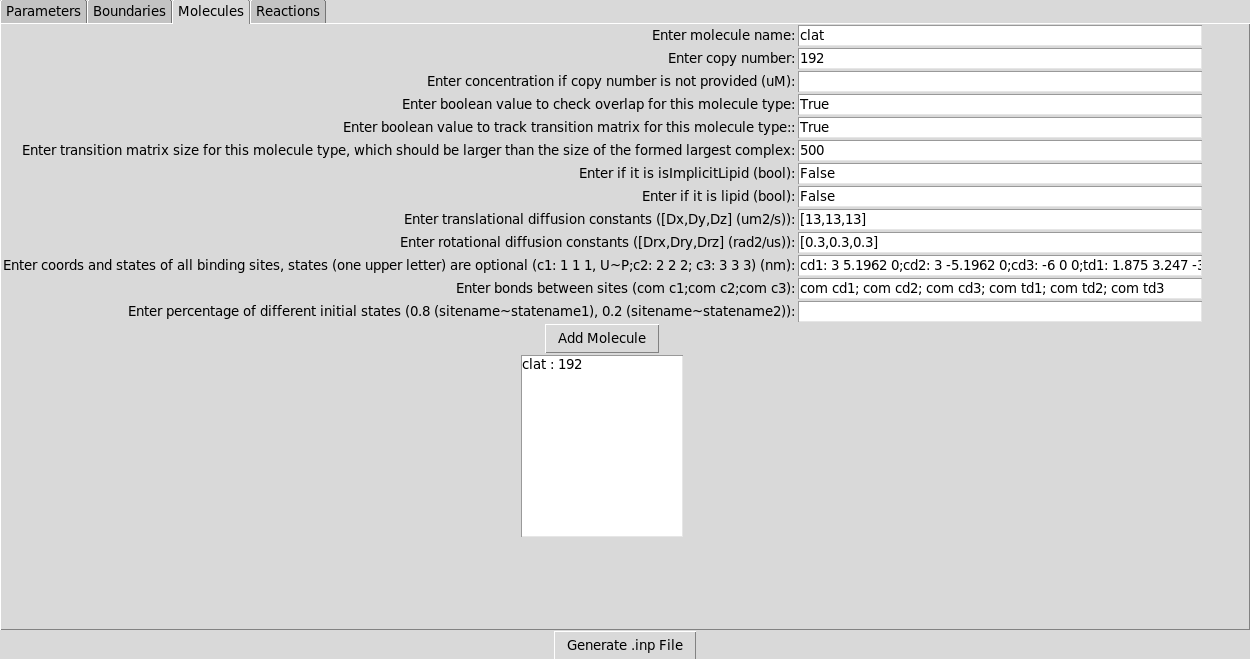

#### 2.1.2 Adaptor Protein
The adaptor protein has two binding sites, one for clathrin and one for PIP2. Both sites are colinear with the COM and are both 2 nm apart from the COM.

The coordinates of the binding sites of adaptor protein relative to its center of mass are (unit = nm):
- m2muh 0 0 -2
- b2clat 0 0 2

The translational diffusion constants and rotational diffusion constants of ap we will use are Dt = [25, 25, 25] (unit = um2/s) , Dr = [0.5, 0.5, 0.5] (unit = rad2/us).

Again, let's fill in the information as below and again click ``Add Molecule`` when finished. A `"ap2.mol"` will be generated in the current directory.


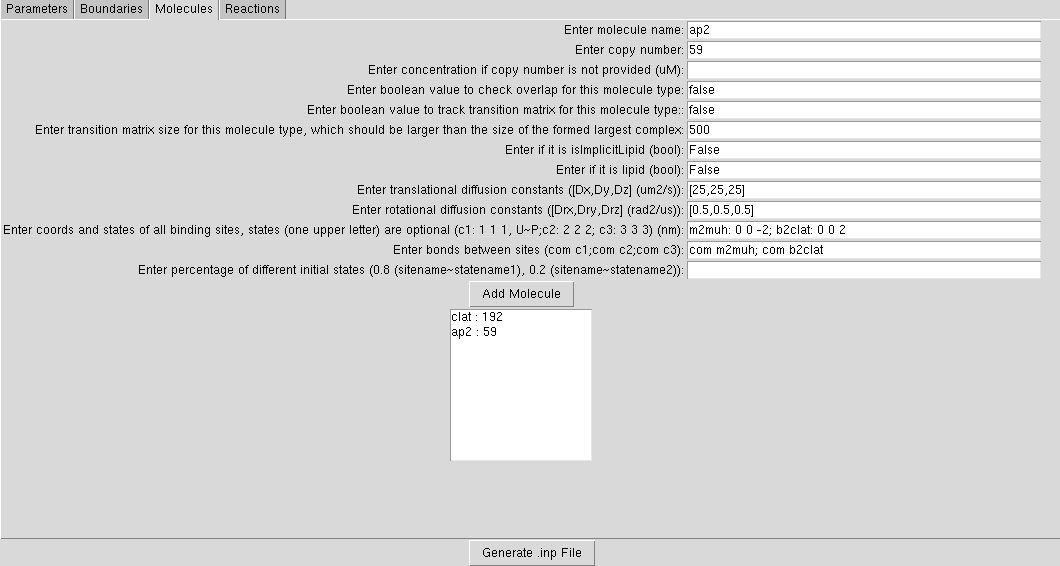

#### 2.1.3 PIP2
This is the membrane lipid that binds to the adaptor protein. It has one binding site, which is 0.0001 nm above the COM. It only diffuses 2 dimensionally on the membrane, so we will set the translational diffusion constant in the z direction to 0. It also only rotates with respect to the z axis so its rotational diffusion constants in the x and y directions are 0.

The coordinate of the binding site of PIP2 relative to its center of mass is (unit = nm):
- head 0 0 0.0001

The translational diffusion constants and rotational diffusion constants of PIP2 we will use are Dt = [0.5, 0.5, 0] (unit = um2/s), Dr = [0, 0, 0.01] (unit = rad2/us).

Fill in the information and click ``Add Molecule`` when finished. A `"pip2.mol"` will be generated in the current directory.

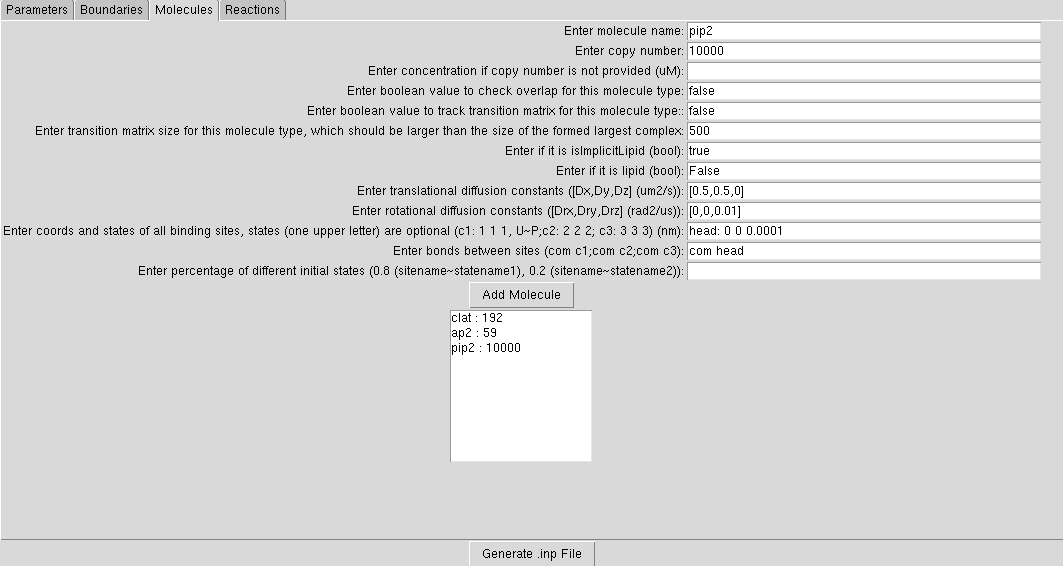

### 2.2 .inp file
The .inp file records the simulation parameters, reactions between molecules, and initial configuration of the system. For more information, please refer to the NERDSS user guide in the NERDSS github repository. (https://github.com/mjohn218/NERDSS)

#### 2.2.1 Parameters tab
Go to the ``Parameters`` tab and fill in the information as shown in the image below and **do NOT** click ``Generate .inp file`` just yet.
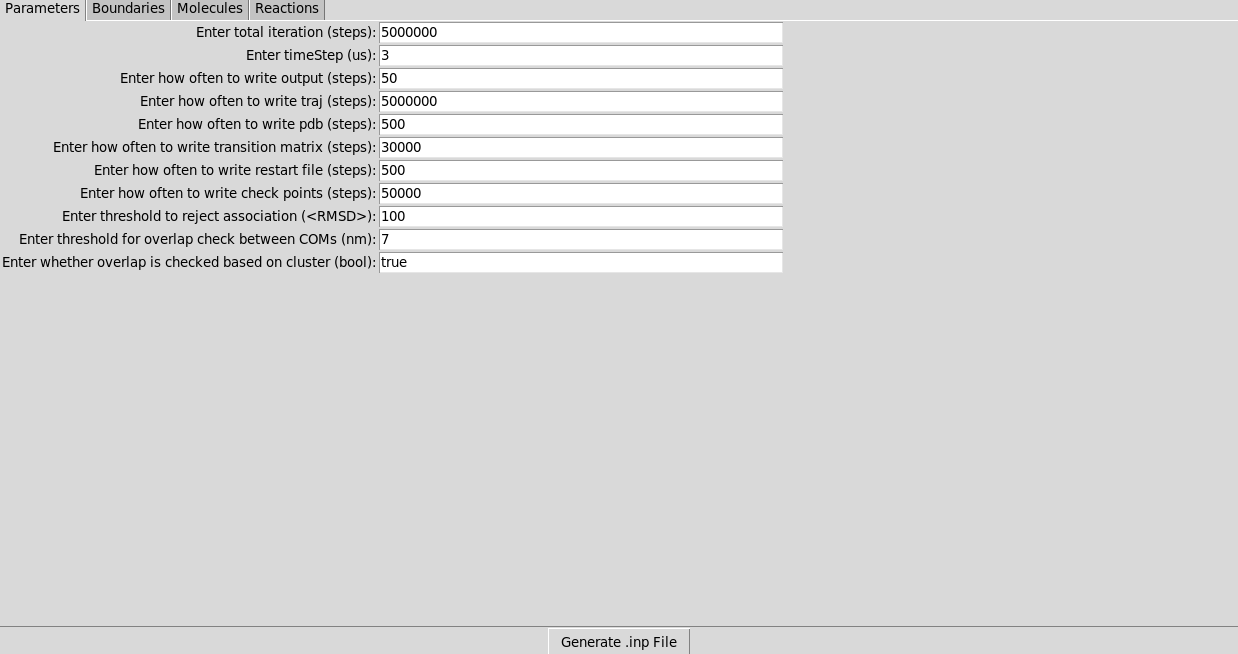

#### 2.2.2 Boundaries tab
Go to the ``Boundaries`` tab and fill in the information as shown in the image below and **do NOT** click ``Generate .inp file`` just yet.
- We will constraint this simulation to a box with dimensions 700, 700, 1000 nm.
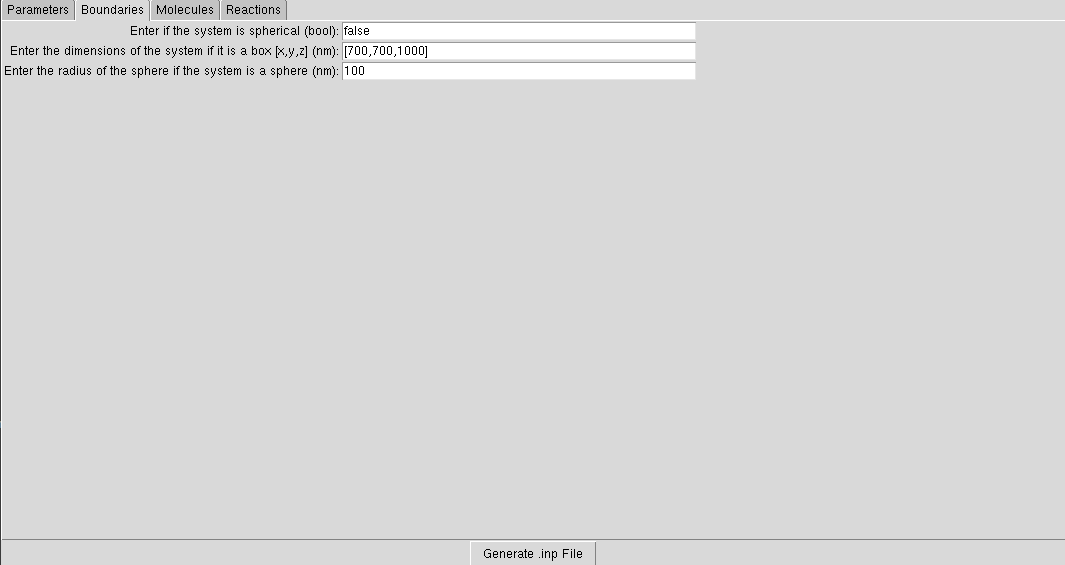

#### 2.2.3 Reactions tab
Go to the ``Reactions`` tab and specify all the possible reactions between the molecules during simulation and the reaction parameters. For this simulation, we will have the following reactions:

- Between pip2 and ap2
    - ap2(m2muh) + pip2(head) <-> ap2(m2muh!1).pip2(head!1)
        - onRate3Dka = 0.554
        - offRatekb = 1.002
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - assocAngles = [1.5707963, 1.5707963, nan, nan, M_PI]
        - observeLabel = ap2Mem
        
- Between ap2 and clat (Only binds to clathrin if it is on the membrane, unbinds always)
    - ap2(b2clat,m2muh!*) + clat(td1) <-> ap2(b2clat!1,m2muh!*).clat(td1!1)
        - onRate3Dka = 0.00199
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]
    - ap2(b2clat,m2muh!*) + clat(td2) <-> ap2(b2clat!1,m2muh!*).clat(td2!1)
        - onRate3Dka = 0.00199
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]
    - ap2(b2clat,m2muh!*) + clat(td3) <-> ap2(b2clat!1,m2muh!*).clat(td3!1)
        - onRate3Dka = 0.00199
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]
    - ap2(b2clat) + clat(td1) <-> ap2(b2clat!1).clat(td1!1)
        - onRate3Dka = 0
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]

    - ap2(b2clat) + clat(td2) <-> ap2(b2clat!1).clat(td2!1)
        - onRate3Dka = 0
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]

    - ap2(b2clat) + clat(td3) <-> ap2(b2clat!1).clat(td3!1)
        - onRate3Dka = 0
        - offRatekb = 0.03
        - sigma = 1.0
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - length3Dto2D = 30 # in nm
        - assocAngles = [1.5707963, 2.466852, nan, pi, pi]

- Between clat and clat
    
    - clat(cd1,td1,td2,td3) + clat(cd2,td1,td2,td3) <-> clat(cd1!1,td1,td2,td3).clat(cd2!1,td1,td2,td3)
        - onRate3Dka = 0.277
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

    - clat(cd1,td1,td2,td3) + clat(cd3,td1,td2,td3) <-> clat(cd1!1,td1,td2,td3).clat(cd3!1,td1,td2,td3)
        - onRate3Dka = 0.277
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

    - clat(cd2,td1,td2,td3) + clat(cd3,td1,td2,td3) <-> clat(cd2!1,td1,td2,td3).clat(cd3!1,td1,td2,td3)
        - onRate3Dka = 0.277
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

    - clat(cd1,td1,td2,td3) + clat(cd1,td1,td2,td3) <-> clat(cd1!1,td1,td2,td3).clat(cd1!1,td1,td2,td3)
        - onRate3Dka = 0.1385
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

    - clat(cd2,td1,td2,td3) + clat(cd2,td1,td2,td3) <-> clat(cd2!1,td1,td2,td3).clat(cd2!1,td1,td2,td3)
        - onRate3Dka = 0.1385
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

    - clat(cd3,td1,td2,td3) + clat(cd3,td1,td2,td3) <-> clat(cd3!1,td1,td2,td3).clat(cd3!1,td1,td2,td3)
        - onRate3Dka = 0.1385
        - offRatekb = 10
        - norm1 = [0,0,1]
        - norm2 = [0,0,1]
        - sigma = 5.0
        - bindRadSameCom = 1.1
        - loopCoopFactor = 0.001
        - length3Dto2D = 30 # in nm
        - assocAngles = [M_PI,M_PI,nan,nan,0]
        - observeLabel = leg

- Clat- Clat, with at least one clat had an ap2 bound
    - #1+2
    -  clat(cd1,td1!*) + clat(cd2) <-> clat(cd1!1,td1!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd1,td2!*) + clat(cd2) <-> clat(cd1!1,td2!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd1,td3!*) + clat(cd2) <-> clat(cd1!1,td3!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - #2+1
    clat(cd2,td1!*) + clat(cd1) <-> clat(cd2!1,td1!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd2,td2!*) + clat(cd1) <-> clat(cd2!1,td2!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd2,td3!*) + clat(cd1) <-> clat(cd2!1,td3!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10
    - #1+3
    - clat(cd1,td1!*) + clat(cd3) <-> clat(cd1!1,td1!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd1,td2!*) + clat(cd3) <-> clat(cd1!1,td2!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd1,td3!*) + clat(cd3) <-> clat(cd1!1,td3!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - #3+1
    - clat(cd3,td1!*) + clat(cd1) <-> clat(cd3!1,td1!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd3,td2!*) + clat(cd1) <-> clat(cd3!1,td2!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd3,td3!*) + clat(cd1) <-> clat(cd3!1,td3!*).clat(cd1!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - #2+3
    - clat(cd2,td1!*) + clat(cd3) <-> clat(cd2!1,td1!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd2,td2!*) + clat(cd3) <-> clat(cd2!1,td2!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd2,td3!*) + clat(cd3) <-> clat(cd2!1,td3!*).clat(cd3!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - #3+2
    - clat(cd3,td1!*) + clat(cd2) <-> clat(cd3!1,td1!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd3,td2!*) + clat(cd2) <-> clat(cd3!1,td2!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10

    - clat(cd3,td3!*) + clat(cd2) <-> clat(cd3!1,td3!*).clat(cd2!1)
        - onRate3Dka = 3.047 #0.277*11
        - offRatekb = 10


    - #2+2
    - clat(cd2,td1!*) + clat(cd2) <-> clat(cd2!1,td1!*).clat(cd2!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - clat(cd2,td2!*) + clat(cd2) <-> clat(cd2!1,td2!*).clat(cd2!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10
    
    - clat(cd2,td3!*) + clat(cd2) <-> clat(cd2!1,td3!*).clat(cd2!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - #1+1
    - clat(cd1,td1!*) + clat(cd1) <-> clat(cd1!1,td1!*).clat(cd1!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - clat(cd1,td2!*) + clat(cd1) <-> clat(cd1!1,td2!*).clat(cd1!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - clat(cd1,td3!*) + clat(cd1) <-> clat(cd1!1,td3!*).clat(cd1!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - #3+3
    - clat(cd3,td1!*) + clat(cd3) <-> clat(cd3!1,td1!*).clat(cd3!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - clat(cd3,td2!*) + clat(cd3) <-> clat(cd3!1,td2!*).clat(cd3!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10

    - clat(cd3,td3!*) + clat(cd3) <-> clat(cd3!1,td3!*).clat(cd3!1)
        - onRate3Dka = 1.5235 #0.1385*11
        - offRatekb = 10



#### To input a reaction and its parameters, fill in the information and click ``Add Reaction``. For instance, consider the first listed reaction:
-   ap2(m2muh) + pip2(head) <-> ap2(m2muh!1).pip2(head!1)
    - onRate3Dka = 0.554
    - offRatekb = 1.002
    - sigma = 1.0
    - norm1 = [0,0,1]
    - norm2 = [0,0,1]
    - assocAngles = [1.5707963, 1.5707963, nan, nan, M_PI]
    - observeLabel = ap2Mem

Fill in the information as shown in the image below and click ``Add Reaction``:
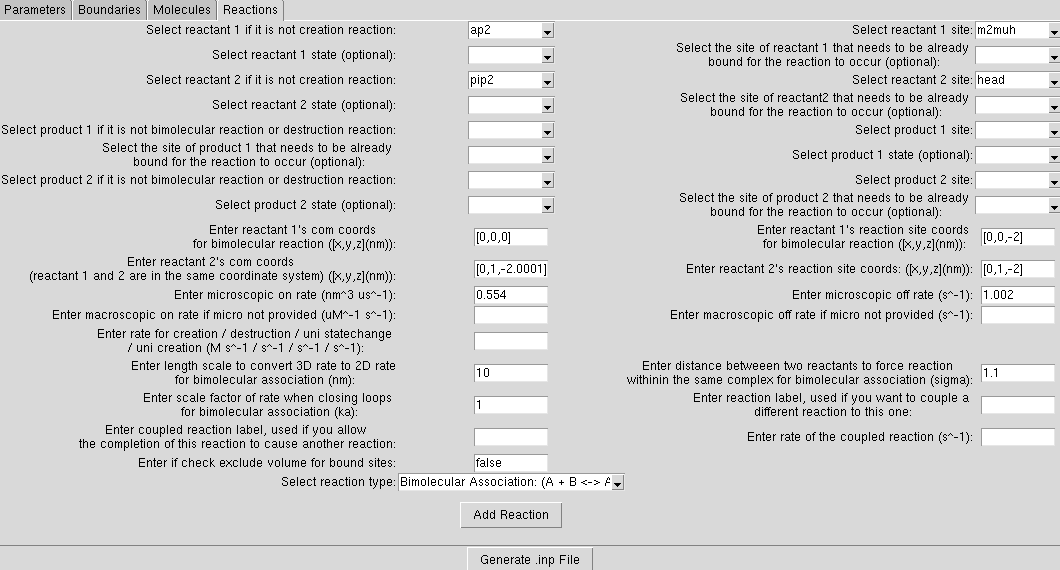

After adding all the reactions, click ``Generate .inp file`` to generate the .inp file. A ``parms.inp`` file should be found at your working directory after clicking the button.

## 3. Running simulation

Clone NERDSS repository from Github (https://github.com/mjohn218/NERDSS). Refer to the user guide and install NERDSS on local device. After installation NERDSS, a executable file named 'nerdss.exe' will be found.

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below in system command line to start simulation:

> ./nerdss -f parms.inp

When the simulation concludes, several NERDSS outpus files and directories will be generated in the current directoy. These include:
- observables_time.dat
- copy_numbers_time.dat
- histogram_complexes_time.dat
- mono_dimer_time.dat
- bound_pair_time.dat
- transition_matrix_time.dat
- restart.dat
- /RESTARTS
- /PDB
- initial_crds.xyz
- final_coords.xyz
- trajectory.xyz
- system.psf

Some of these files may not be generated based on different input parameters. For more information on these output files, please refer to the NERDSS user guide found in the NERDSS github repository.


## 4. Analyzing simulation results

ioNERDSS includes a variety of functions to analyze and visualize the simulation results. The codes below will show some of them. For multiple species, the tutorial on all of them can be found in `MultiSpeciesTutorial`, which is also in the ioNERDSS github repository. A more detailed description on the functions and all of there parameters can be found in the `ioNERDSS User Guide` in the ioNERDSS github repository.

In [1]:
import ioNERDSS as io

In [3]:
# create a multi-species histogram object
multi_species = io.MultiHistogram(FileName="./ReadyToGoOutputFiles/1/histogram_complexes_time.dat",FileNum=1,InitialTime=0.0,FinalTime=90.0,SpeciesList=["clat", "pip2", "ap2"])

### 4.1 Max count of protein species in a single complex at a time

Creates a plot indicating maximum number of a specific protein species in single complex molecule during a certain time period. X-axis is time, and Y-axis is the largest # of the tracked protein in a single complex.

Find longer description under "``2.1.5 LINE GRAPH – max count of protein species in a single complex at a time``" in the UserGuide.

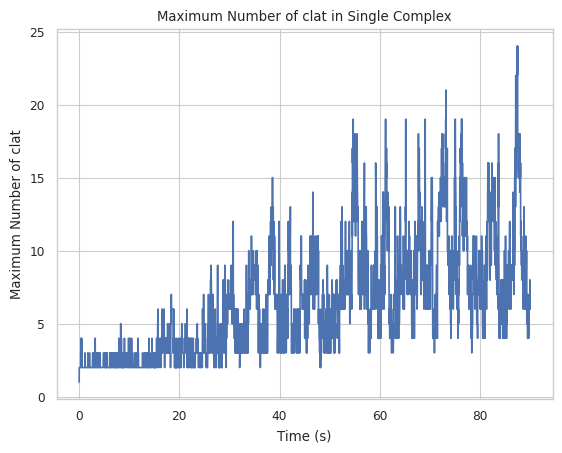

In [4]:
result = multi_species.line_max_complex_size(SpeciesName = 'clat')

### 4.2 Mean count of protein species in a single complex at a time

Creates a plot indicating averaged number of a specific protein species in single complex molecule during a certain time period. X-axis is time, and Y-axis is the average # of the tracked protein in a single complex.

Find longer description under "``2.1.6 LINE GRAPH – mean count of protein species in a single complex at a time ``" in the UserGuide.

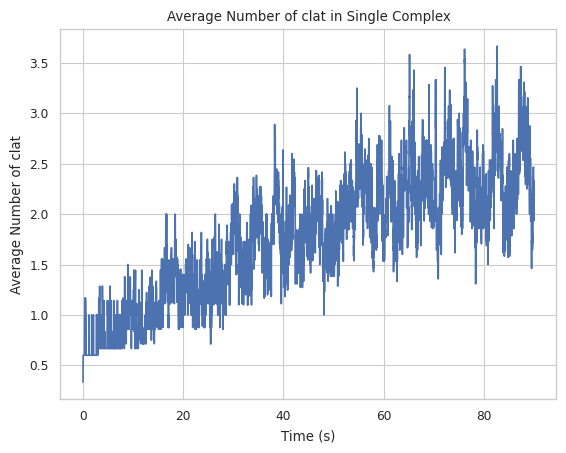

In [5]:
result = multi_species.line_mean_complex_size(SpeciesName = 'clat')